## > 5 issues of Multi-LinearModels ?

1. Non-linearity of the response-predictor relationships
2. Correlation of error terms
3. Non-constant Variance and Normally Distributed Errors
4. Outliers/ High leverage points
5. Multi-Collinearity

### How to identify if these problems exist, as well as how to address them ?
This is a common interview question asked by statisticians, but its practical importance is hit or miss depending on the purpose of your model.

## 1. Linearity 
The assumption of linearity is that a linear model is the relationship that truly exists between your response and predictor variables. If this isn't true, then your predictions will not be very accurate. Additionally, the linear relationships associated with your coefficients really aren't useful either.

In order to assess if a linear relationship is reasonable, a plot of the residuals $(y−\hat{y})$ by the predicted values $\hat{y}$ is often useful. If there are curvature patterns in this plot, it suggests that a linear model might not actually fit the data, and some other relationship exists between the predictor variables and response. There are many ways to create non-linear models (even using the linear model form).

Ideally, we want to see a random scatter of points.

## 2. Correlated Errors
Correlated errors frequently occur when our data are collected over time (like in forecasting stock prices or interest rates in the future) or data are spatially related (like predicting flood or drought regions). We can often improve our predictions by using information from the past data points (for time) or the points nearby (for space).

The main problem with not accounting for correlated errors is that you can often use this correlation to your advantage to better predict future events or events spatially close to one another.

One of the most common ways to identify if you have correlated errors is based on the domain from which the data where collected. If you are unsure, there is a test known as a Durbin-Watson test that is commonly used to assess whether correlation of the errors is an issue. Then ARIMA or ARMA models are commonly implemented to use this correlation to make better predictions.

## 3. Non-constant Variance and Normally Distributed Errors
Non-constant variance is when the spread of your predicted values differs depending on which value you are trying to predict. This isn't a huge problem in terms of predicting well. However, it does lead to confidence intervals and p-values that are inaccurate. Confidence intervals for the coefficients will be too wide for areas where the actual values are closer to the predicted values, but too narrow for areas where the actual values are more spread out from the predicted values.

Commonly, a log (or some other transformation of the response variable is done) in order to "get rid" of the non-constant variance. In order to choose the transformation, a Box-Cox is commonly used.

Non-constant variance can be assessed again using a plot of the residuals by the predicted values. In the image at the bottom of the page, non-constant variance is labeled as heteroscedastic. Ideally, we want an unbiased model with homoscedastic residuals (consistent across the range of values).

## 4. Outliers/Leverage Points
Outliers and leverage points are points that lie far away from the regular trends of your data. These points can have a large pull on your solution. In practice, these points might even be typos. If you are aggregating data from multiple sources, it is possible that some of the data values were carried over incorrectly or aggregated incorrectly.

Other times outliers are accurate and true data points, not necessarily measurement or data entry errors. In these cases, 'fixing' is more subjective. Often the strategy for working with these points is dependent on the goal of your analysis. Linear models using ordinary least squares, in particular, are not very robust. That is, large outliers may greatly change our results. There are techniques to combat against this - largely known as regularization techniques. 

## 5. Collinearity (Multi-collinearity)
Multicollinearity is when we have predictor variables that are correlated with one another. One of the main concerns of multicollinearity is that it can lead to coefficients being flipped from the direction we expect from simple linear regression.

One of the most common ways to identify multicollinearity is with bivariate plots or with variance inflation factors (or VIFs). 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import statsmodels.api as sm
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
df = pd.read_csv('C:/Users/Minkun/Desktop/classes_1/NanoDeg/1.Data_AN/L4/data/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


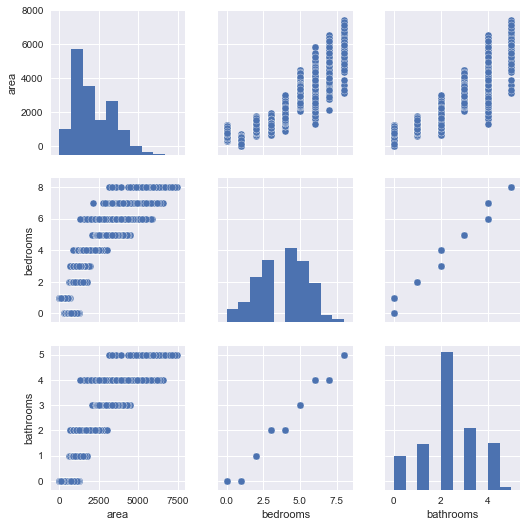

In [6]:
# Look at the relationship b/w quant-predictors..
sb.pairplot(df[['area','bedrooms','bathrooms']])

In [7]:
df['intercept'] = 1

In [8]:
lm = sm.OLS(df['price'], df[['intercept','area','bedrooms','bathrooms']])
result = lm.fit()
result.summary() #fucked up and flipped relationship b/w response & predictors..

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 01 Jan 2018   Prob (F-statistic):               0.00
Time:                        20:14:02   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## $ VIF = 1 / (1 - R^2) $

In [21]:
# Method II.

# variance inflation factors (VIF)
y, X = dmatrices('price ~ area + bedrooms + bathrooms', df, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

vif 
# if we have vif larger than '10', ...multicollinearity.. = 1/(1 - R^2)
# The most common way of working with correlated explanatory variables in a multiple linear regression model, is simply to 
#remove one of the variables that is most related to the other variables. 

,VIF Factor,features
0,7.327102,Intercept
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


In [22]:
# Remove bathrooms from your above model. Refit the multiple linear regression model and re-compute the VIFs. 

lm = sm.OLS(df['price'], df[['intercept','area','bedrooms']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6345.
Date:                Mon, 25 Dec 2017   Prob (F-statistic):               0.00
Time:                        22:39:32   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
intercept   7857.4509   9425.288      0.834      0.405     -1.06e+04  2.63e+04
area         346.4458      7.152     48.443      0.000       332.426   360.466
bedrooms    1626.8306   5191.702      0.313      0.754     -8550.763  1.18e+04
==============================================================================
Omnibus:                      368.146   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.224
Skew:                           0.535   Prob(JB):                     8.91e-77
Kurtosis:                       2.502   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
y, X = dmatrices('price ~ area + bedrooms', df, return_type='dataframe')

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

vif 

,VIF Factor,features
0,6.063895,Intercept
1,5.345400,area
2,5.345400,bedrooms


In [ ]:
# Now, All of VIF become blow 10. but....R-squared value stay the same!!!! this suggest we don't need both 'bedrooms' and 
#'bathrooms' in the model. 

## > Higher Order Term
When do we use it?
When creating models with quadratic, cubic, or even higher orders of a variable, we are essentially looking at how many curves there are in the relationship between the explanatory and response variables.

*Quadratic: If there is one curve...

*Cubic: If there are two curves...

*Interaction: If there is a way $X_1$(quant) is related to the __RESPONSE__ is dependent on $X_2$(categorical)...in most case, the introduction of categorical predictors...when the slope of the same variable is different according to the category....we go $X_1X_2$ 

before : $\hat{y} = b_0 + b_1x_1 + b_2x_2 $

after: $\hat{y} = b_0 + b_1x_1 + b_2x_1^2 + b_3x_2 + b_4x_1x_2 $

In general, these terms can help you fit more complex relationships in your data. However, they also takeaway from the ease of interpreting coefficients. 


In [ ]:
# Creating quadratic terms
#df['bedrooms_sq'] = df['bedrooms']*df['bedrooms']

# Creating interaction terms

In [9]:
# model 1.
# fit a model to predict price using neighborhood, style, and the area of the home. 
# (Don't forget an intercept! You will also need to build your dummy variables, and don't forget to drop one of the columns when
#you are fitting your linear model. )

df['intercept'] = 1
df[['A', 'B', 'C']] = pd.get_dummies(df['neighborhood'])
df[['lodge', 'ranch', 'victorian']] = pd.get_dummies(df['style'])

df.head(6)

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C,lodge,ranch,victorian
0,1112,B,1188,3,2,ranch,598291,1,0.0,1.0,0.0,0.0,1.0,0.0
1,491,B,3512,5,3,victorian,1744259,1,0.0,1.0,0.0,0.0,0.0,1.0
2,5952,B,1134,3,2,ranch,571669,1,0.0,1.0,0.0,0.0,1.0,0.0
3,3525,A,1940,4,2,ranch,493675,1,1.0,0.0,0.0,0.0,1.0,0.0
4,5108,B,2208,6,4,victorian,1101539,1,0.0,1.0,0.0,0.0,0.0,1.0
5,7507,C,1785,4,2,lodge,455235,1,0.0,0.0,1.0,1.0,0.0,0.0


In [10]:
lm = sm.OLS(df['price'], df[['intercept', 'A', 'B', 'ranch', 'victorian', 'area']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 1.372e+04
Date:                Mon, 01 Jan 2018   Prob (F-statistic):               0.00
Time:                        20:14:12   Log-Likelihood:                -80348.
No. Observations:                6028   AIC:                         1.607e+05
Df Residuals:                    6022   BIC:                         1.607e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.983e+05   5540.744    -35.791      0.000   -2.09e+05   -1.87e+05
A           -194.2464   4965.459     -0.039      0.969   -9928.324    9539.832
B           5.243e+05   4687.484    111.844      0.000    5.15e+05    5.33e+05
ranch      -1974.7032   5757.527     -0.343      0.732   -1.33e+04    9312.111
victorian  -6262.7365   6893.293     -0.909      0.364   -1.98e+04    7250.586
area         348.7375      2.205    158.177      0.000     344.415     353.060
==============================================================================
Omnibus:                      114.369   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.082
Skew:                           0.271   Prob(JB):                     6.29e-31
Kurtosis:                       3.509   Cond. No.                     1.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
df.groupby('style').mean()[['price', 'area']]

,price,area
style,,
lodge,3.050176e+05,848.978031
ranch,5.751318e+05,1611.317980
victorian,1.046083e+06,2980.959960


In [12]:
# model 2.
#  fit a model to predict price using area and area squared. Also use the style of the home

df['area_squared'] = df['area']*df['area']
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price,intercept,A,B,C,lodge,ranch,victorian,area_squared
0,1112,B,1188,3,2,ranch,598291,1,0.0,1.0,0.0,0.0,1.0,0.0,1411344
1,491,B,3512,5,3,victorian,1744259,1,0.0,1.0,0.0,0.0,0.0,1.0,12334144
2,5952,B,1134,3,2,ranch,571669,1,0.0,1.0,0.0,0.0,1.0,0.0,1285956
3,3525,A,1940,4,2,ranch,493675,1,1.0,0.0,0.0,0.0,1.0,0.0,3763600
4,5108,B,2208,6,4,victorian,1101539,1,0.0,1.0,0.0,0.0,0.0,1.0,4875264


In [13]:
lm2 = sm.OLS(df['price'], df[['intercept', 'area', 'area_squared', 'ranch', 'victorian']])
results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     3173.
Date:                Mon, 01 Jan 2018   Prob (F-statistic):               0.00
Time:                        20:15:37   Log-Likelihood:                -84516.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6023   BIC:                         1.691e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept     1.855e+04   1.26e+04      1.467      0.142   -6229.316    4.33e+04
area           334.0146     13.525     24.696      0.000     307.501     360.528
area_squared     0.0029      0.002      1.283      0.199      -0.002       0.007
ranch         9917.2547   1.27e+04      0.781      0.435    -1.5e+04    3.48e+04
victorian     2509.3956   1.53e+04      0.164      0.870   -2.75e+04    3.25e+04
==============================================================================
Omnibus:                      375.220   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              340.688
Skew:                           0.519   Prob(JB):                     1.05e-74
Kurtosis:                       2.471   Cond. No.                     4.33e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""